In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/CC GENERAL.csv')

In [3]:
df = df[['BALANCE','PURCHASES']]

In [4]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans, DBSCAN
import numpy as np

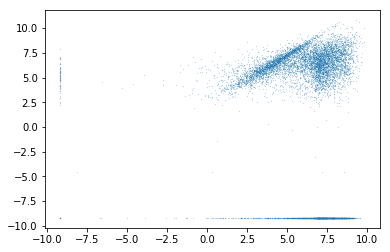

In [6]:
plt.scatter(np.log(0.0001+df.values[:,0]),np.log(0.0001+df.values[:,1]),s=0.01)

In [7]:
cData = MinMaxScaler().fit_transform(np.log(0.0001+df.values))

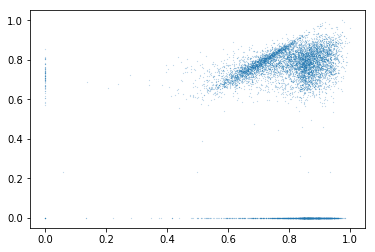

In [8]:
plt.scatter(cData[:,0],cData[:,1],s=0.01)

In [17]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture

for k in range(2,6,1):
    model = GaussianMixture(n_components=k)
    model.fit(cData)
    labels = model.predict(cData)
    print (silhouette_score(cData,labels=labels))

0.8116398964005989
0.5792063782038509
0.5299369972000276
0.43240895587982076


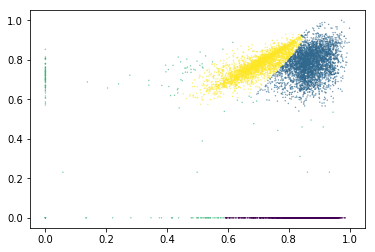

In [63]:
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
model = BayesianGaussianMixture(n_components=4)
model.fit(cData)
labels = model.predict(cData)
plt.scatter(cData[:,0],cData[:,1],c=labels,s=0.1)

Text(0,0.5,'purchases')

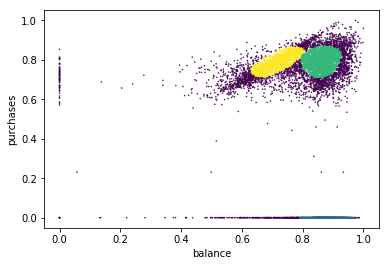

In [57]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.03,min_samples=400)
model.fit(cData)
plt.scatter(cData[:,0],cData[:,1],c=model.labels_,s=0.3)
plt.xlabel('balance')
plt.ylabel('purchases')

In [59]:
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
from sklearn.neighbors.nearest_centroid import NearestCentroid
nc = NearestCentroid()
nc.fit(cData[core_samples_mask],model.labels_[core_samples_mask])
nc.centroids_

array([[0.87800075, 0.        ],
       [0.85977544, 0.79283259],
       [0.71005418, 0.78748629]])

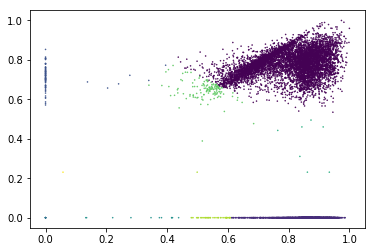

In [47]:
from sklearn.cluster import MeanShift
model = MeanShift(bandwidth=0.15,min_bin_freq=10)
model.fit(cData)
plt.scatter(cData[:,0],cData[:,1],c=model.labels_,s=0.3)

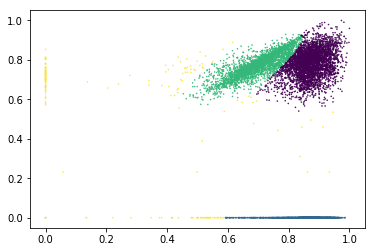

In [52]:
from sklearn.cluster import MeanShift
from sklearn.mixture import BayesianGaussianMixture
model = BayesianGaussianMixture(n_components=4)
model.fit(cData)
labels = model.predict(cData)
plt.scatter(cData[:,0],cData[:,1],c=labels,s=0.3)